In [31]:
import numpy as np
from ipywidgets import interact
import seaborn as sns; sns.set()
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline

In [54]:
# define pAA, pAB, pBB
# A's are zeros, B's are ones

pAA = -1
pBB = -1
pAB = -1.5

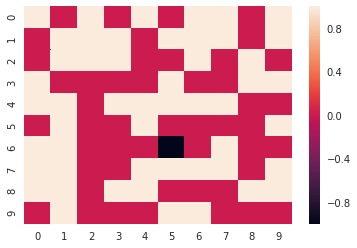

In [55]:
# lattice initialisation

n=10

#lat = np.zeros([n,n])
lat = (np.random.rand(n,n)<0.5)*1.0
init_lat=lat

vacancy_pos = int(n/2),int(n/2)
vacancy_pos = vacancy_pos[0]+1,vacancy_pos[1]

lat[vacancy_pos] = -1

larger_lat = np.ones([n+2,n+2])*0.5

ax = sns.heatmap(lat[:,:])
plt.show()

Initial energy =  -306.5


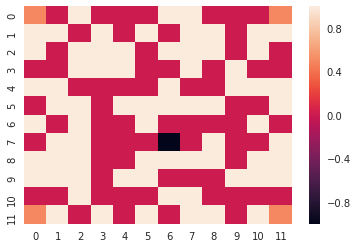

In [56]:
# return larger lattice for applying periodic boundary conditions

def periodic_bd(lat):
    
    larger_lat = np.ones([n+2,n+2])*0.5
    larger_lat[1:-1,1:-1] = lat
    larger_lat[1:-1,0] = lat[:,-1]
    larger_lat[1:-1,-1] = lat[:,0]
    larger_lat[0,1:-1] = lat[-1,:]
    larger_lat[-1,1:-1] = lat[0,:]
    
    return larger_lat


larger_lat = periodic_bd(lat)
def calc_energy_total(lat):
    
    larger_lat = periodic_bd(lat)
    energy=0
    
    for i in range(n+1):        
        for j in range(n+1):
            
            energy += (larger_lat[i,j]==larger_lat[i+1,j]==0)*pAA + \
            (larger_lat[i,j]==larger_lat[i+1,j]==1)*pBB + \
            ((larger_lat[i,j]!=larger_lat[i+1,j])&(larger_lat[i+1,j]!=0.5))*pAB + \
            (larger_lat[i,j]==larger_lat[i,j+1]==0)*pAA + \
            (larger_lat[i,j]==larger_lat[i,j+1]==1)*pBB + \
            ((larger_lat[i,j]!=larger_lat[i,j+1])&(larger_lat[i,j+1]!=0.5))*pAB
            
    return energy

initial_energy = calc_energy_total(lat)

print("Initial energy = ", initial_energy)

larger_lat = periodic_bd(lat)
vacancy_pos = vacancy_pos[0]+1,vacancy_pos[1]+1

ax = sns.heatmap(larger_lat)
plt.show()

In [57]:
def calc_energy_one(pos,larger_lat):
    
    i1 = pos[0]
    j1 = pos[1]
    
    energy = (larger_lat[i1,j1]==larger_lat[i1+1,j1]==0)*pAA + \
    (larger_lat[i1,j1]==larger_lat[i1+1,j1]==1)*pBB + \
    ((larger_lat[i1,j1]!=larger_lat[i1+1,j1])&(larger_lat[i1+1,j1]!=0.5))*pAB + \
    (larger_lat[i1,j1]==larger_lat[i1,j1+1]==0)*pAA + \
    (larger_lat[i1,j1]==larger_lat[i1,j1+1]==1)*pBB + \
    ((larger_lat[i1,j1]!=larger_lat[i1,j1+1])&(larger_lat[i1,j1+1]!=0.5))*pAB + \
    (larger_lat[i1,j1]==larger_lat[i1,j1-1]==0)*pAA + \
    (larger_lat[i1,j1]==larger_lat[i1,j1-1]==1)*pBB + \
    ((larger_lat[i1,j1]!=larger_lat[i1,j1-1])&(larger_lat[i1,j1-1]!=0.5))*pAB + \
    (larger_lat[i1,j1]==larger_lat[i1-1,j1]==0)*pAA + \
    (larger_lat[i1,j1]==larger_lat[i1-1,j1]==1)*pBB + \
    ((larger_lat[i1,j1]!=larger_lat[i1-1,j1])&(larger_lat[i1-1,j1]!=0.5))*pAB
    
    return energy

calc_energy_one((5,5),larger_lat)

-4.5

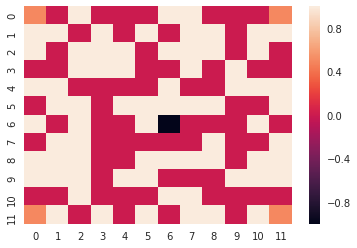

0.5


In [63]:
def swap(pos1,pos2,larger_lat):
    
    new = np.copy(larger_lat)
    temp = new[pos2]
    new[pos2] = new[pos1]
    new[pos1] = temp
    
    delta_e = (-calc_energy_one(pos1,larger_lat) \
    - calc_energy_one(pos2,larger_lat) \
    + calc_energy_one(pos1,new) \
    + calc_energy_one(pos2,new))
    
    return new,delta_e

up = vacancy_pos[0]-1,vacancy_pos[1]

# moving up
#ax = sns.heatmap(larger_lat)
ax = sns.heatmap(swap(vacancy_pos,up,larger_lat)[0])
plt.show()

In [ ]:
def iteration(larger_lat,vacancy_pos):
    
    up = vacancy_pos[0]-1,vacancy_pos[1]
    down = vacancy_pos[0]+1,vacancy_pos[1]
    right = vacancy_pos[0],vacancy_pos[1]+1
    left = vacancy_pos[0],vacancy_pos[1]-1
    
    lat_up,e_up = swap(vacancy_pos,up,larger_lat)
    lat_down,e_down = swap(vacancy_pos,down,larger_lat)
    lat_right,e_right = swap(vacancy_pos,right,larger_lat)
    lat_left,e_left = swap(vacancy_pos,left,larger_lat)
    
    
    